In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
gdf = gpd.read_file('data')
gdf = gdf.to_crs("EPSG:4326")

In [3]:
gdf.head()

,OBJECTID,CLASS,CERTAINTY,PERIOD,HYPERLINK,SOURCE,Shape_Leng,geometry
0,1,Major Road,No,None,None,150K,1114.905046,"LINESTRING (12.52787 41.57414, 12.53158 41.570..."
1,2,Major Road,No,None,None,150K,2651.960299,"LINESTRING (12.53538 41.56589, 12.5526 41.54594)"
2,3,Major Road,No,None,None,150K,3770.593855,"LINESTRING (12.5526 41.54594, 12.57764 41.51785)"
3,4,Major Road,No,None,None,150K,397.780439,"LINESTRING (12.57764 41.51785, 12.58009 41.51479)"
4,5,Major Road,No,None,None,150K,8949.123336,"LINESTRING (12.62197 41.45206, 12.63212 41.526..."


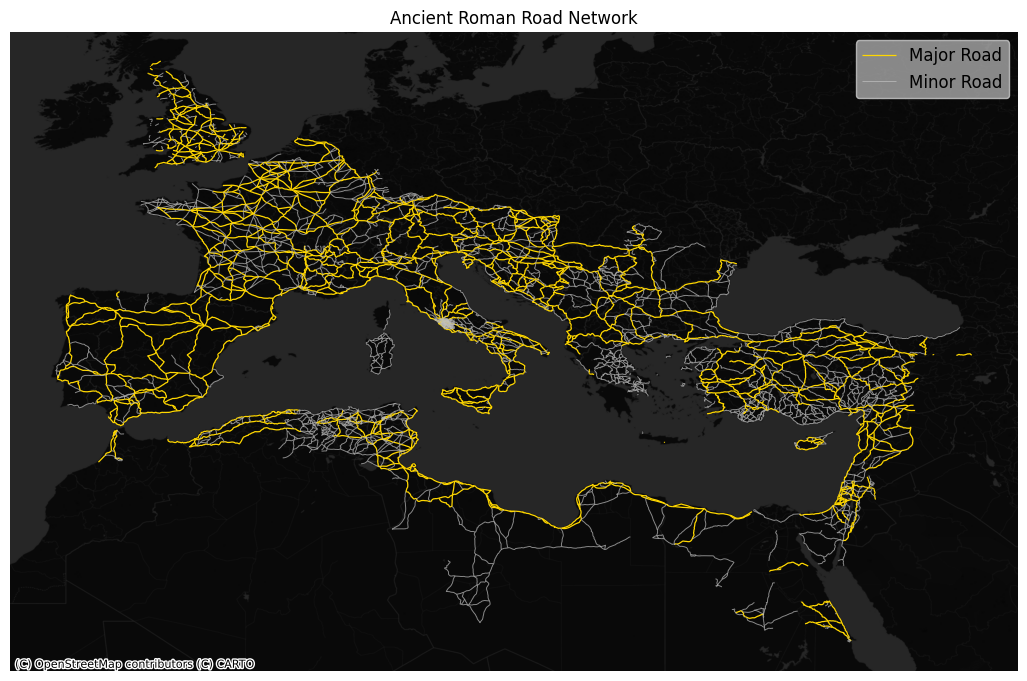

In [4]:
f, ax = plt.subplots(1, 1, figsize=(13, 11))

color_dict = {'Major Road': 'gold', 'Minor Road': 'silver'}

for class_value, color in color_dict.items():
    lw = 0.7 if class_value == 'Minor Road' else 0.9
    alpha = 0.7 if class_value == 'Minor Road' else 1.0
    gdf[gdf['CLASS'] == class_value].plot(ax=ax, lw=lw, color=color, alpha=alpha, label=class_value)

ctx.add_basemap(ax, crs="EPSG:4326", source=ctx.providers.CartoDB.DarkMatterNoLabels, zoom=6)

plt.axis('off')
plt.title('Ancient Roman Road Network')

handles, labels = ax.get_legend_handles_labels()
legend = ax.legend(handles, labels, fontsize='large')
legend.get_frame().set_facecolor('darkgrey')

plt.savefig('Ancient_Roman_Road_Network.png', dpi=400, bbox_inches='tight')
plt.show()